In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import numpy as np

In [ ]:
df = pd.read_csv("/content/data_file.csv")
cols_to_drop = ['FileName', 'md5Hash']
df = df.drop(columns=cols_to_drop)
df.drop_duplicates(keep='last', inplace=True)
df.to_csv("df_clear.csv")

In [ ]:

df = pd.read_csv("df_clear.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32256 entries, 0 to 32255
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          32256 non-null  int64
 1   Machine             32256 non-null  int64
 2   DebugSize           32256 non-null  int64
 3   DebugRVA            32256 non-null  int64
 4   MajorImageVersion   32256 non-null  int64
 5   MajorOSVersion      32256 non-null  int64
 6   ExportRVA           32256 non-null  int64
 7   ExportSize          32256 non-null  int64
 8   IatVRA              32256 non-null  int64
 9   MajorLinkerVersion  32256 non-null  int64
 10  MinorLinkerVersion  32256 non-null  int64
 11  NumberOfSections    32256 non-null  int64
 12  SizeOfStackReserve  32256 non-null  int64
 13  DllCharacteristics  32256 non-null  int64
 14  ResourceSize        32256 non-null  int64
 15  BitcoinAddresses    32256 non-null  int64
 16  Benign              32256 non-null  int6

In [ ]:

X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=20, batch_size=32, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test), callbacks=[early_stopping])

Epoch 1/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8852 - loss: 0.2533 - val_accuracy: 0.9605 - val_loss: 0.1158
Epoch 2/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9602 - loss: 0.1150 - val_accuracy: 0.9688 - val_loss: 0.0971
Epoch 3/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9649 - loss: 0.0961 - val_accuracy: 0.9665 - val_loss: 0.0785
Epoch 4/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9741 - loss: 0.0784 - val_accuracy: 0.9696 - val_loss: 0.1133
Epoch 5/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9759 - loss: 0.0743 - val_accuracy: 0.9772 - val_loss: 0.0766
Epoch 6/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9756 - loss: 0.0689 - val_accuracy: 0.9803 - val_loss: 0.0633
Epoch 7/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9759 - loss: 0.0659 - val_accuracy: 0.9816 - val_loss: 0.0642
Epoch 8/20
807/807 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9787 - loss: 0.0629 - val

In [ ]:
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=20, batch_size=32, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test), callbacks=[early_stopping])

Accuracy: 0.98


In [ ]:
y_pred = (model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1)) > 0.5).astype("int32")

202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2081   60]
 [  49 4262]]


<Figure size 640x480 with 0 Axes>

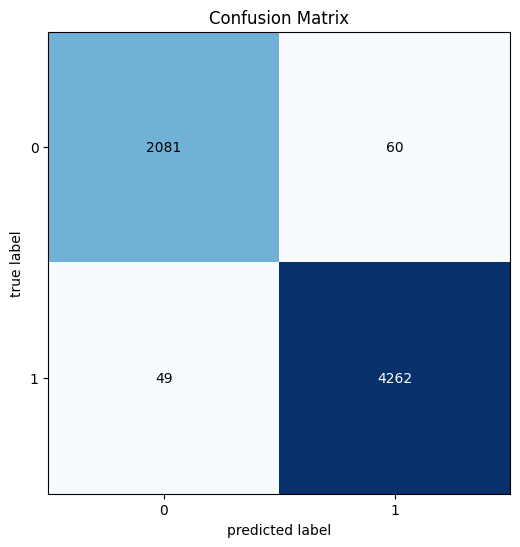

In [ ]:
plt.figure()
plot_confusion_matrix(cm, figsize=(8, 6))
plt.title("Confusion Matrix")
plt.show()

In [ ]:
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2141
           1       0.99      0.99      0.99      4311

    accuracy                           0.98      6452
   macro avg       0.98      0.98      0.98      6452
weighted avg       0.98      0.98      0.98      6452



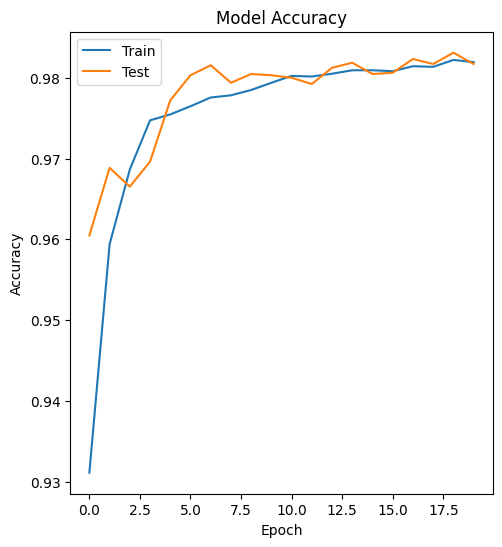

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

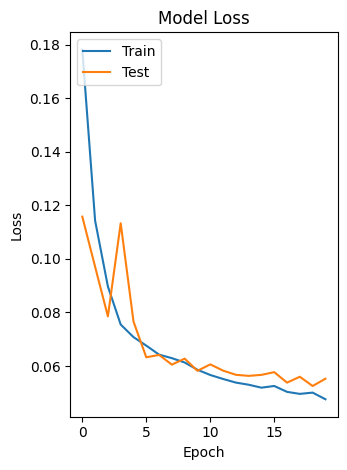

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.tight_layout()
plt.show()

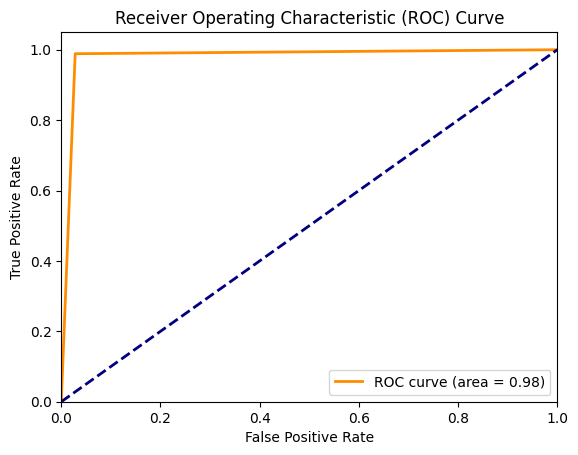

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

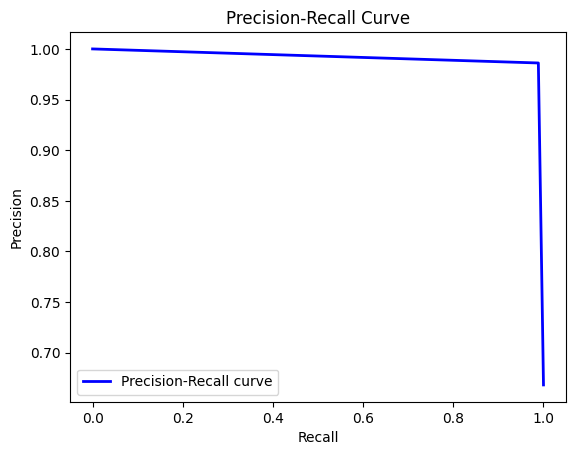

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

ANN

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
import warnings
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier

In [ ]:
df = pd.read_csv("/content/data_file.csv")
# Delete the useless columns:
cols_to_drop = ['FileName', 'md5Hash']
df = df.drop(columns=cols_to_drop)
# Replace the value repeated: MD5HASH - DebugSize - MajorOSVersion - BitcoinAddresses - NumberOfSections - SizeOfStackReserve
columns = ["Machine", "DebugSize", "NumberOfSections", "SizeOfStackReserve", "MajorOSVersion", "BitcoinAddresses"]
for col in columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
# Delete all the duplicated rows:
df.drop_duplicates(keep='last')
# Save the new datasets into a new csv file:
df.to_csv("df_clear.csv")

In [ ]:
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
ann = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=0)

In [ ]:
ann.fit(X_train, y_train)

MLPClassifier(max_iter=1000, random_state=0)

In [ ]:
y_pred = ann.predict(X_test)

In [ ]:
print("Accuracy:", ann.score(X_test, y_test))

Accuracy: 0.8589261422741458


Confusion Matrix for Artificial Neural Network:
[[5609 1498]
 [ 265 5125]]


<Figure size 640x480 with 0 Axes>

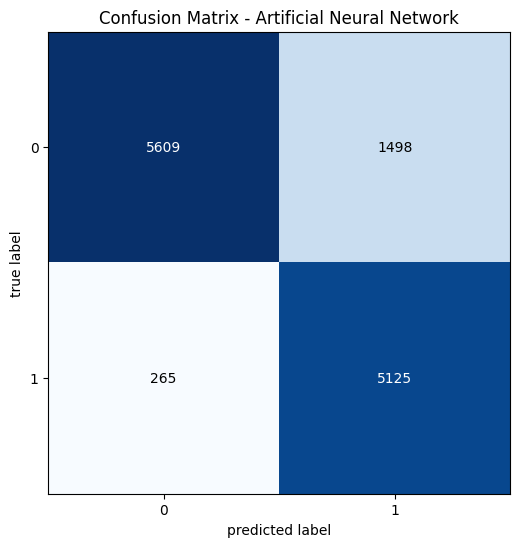

In [ ]:
cm_ann = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Artificial Neural Network:")
print(cm_ann)
plt.figure()
plot_confusion_matrix(cm_ann, figsize=(8, 6))
plt.title("Confusion Matrix - Artificial Neural Network")
plt.show()

In [ ]:

print("Classification Report - Artificial Neural Network:")
print(classification_report(y_test, y_pred))

Classification Report - Artificial Neural Network:
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      7107
           1       0.77      0.95      0.85      5390

    accuracy                           0.86     12497
   macro avg       0.86      0.87      0.86     12497
weighted avg       0.88      0.86      0.86     12497

